Media a posteriori a lui λ: 16.4545
Modul a posteriori al lui λ: 16.3636
Intervalul HDI de 94% pentru λ: [14.2323, 18.8305]



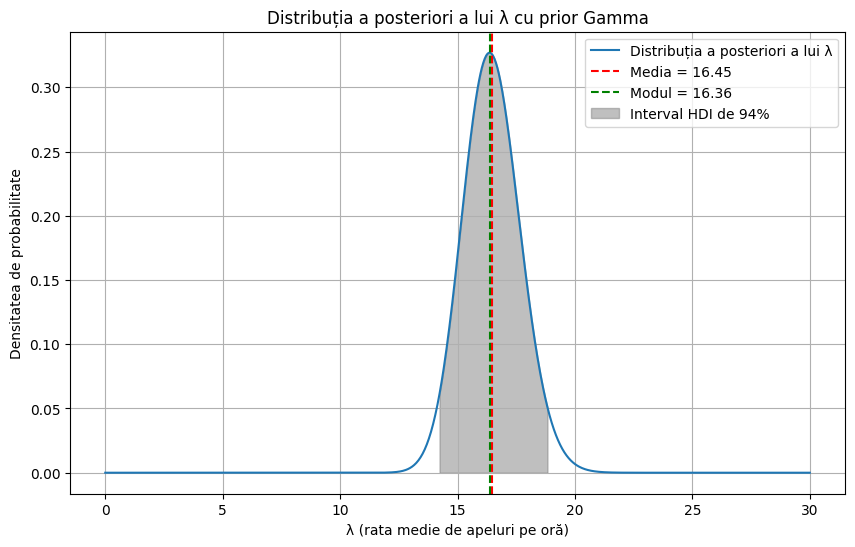

In [12]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Datele de intrare
k = 180    # Numărul total de apeluri observate
T = 10     # Intervalul de timp în ore

# Parametrii distribuției prior Gamma
media_prior = 1  # Media a priori a ratei (apeluri/oră)
dispersia_prior = 1  # Dispersia a priori

# Calculăm parametrii α și β pentru distribuția Gamma prior
alpha_prior = (media_prior / dispersia_prior) ** 2
beta_prior = alpha_prior / media_prior

# Parametrii distribuției Gamma a posteriori
alpha_posterior = alpha_prior + k
beta_posterior = beta_prior + T

# Calculăm media și modulul a posteriori
mean_lambda = alpha_posterior / beta_posterior
mode_lambda = (alpha_posterior - 1) / beta_posterior if alpha_posterior > 1 else np.nan

# Calculăm intervalul HDI de 94% pentru distribuția Gamma a posteriori
lower_bound = stats.gamma.ppf(0.03, a=alpha_posterior, scale=1/beta_posterior)
upper_bound = stats.gamma.ppf(0.97, a=alpha_posterior, scale=1/beta_posterior)

print(f"Media a posteriori a lui λ: {mean_lambda:.4f}")
print(f"Modul a posteriori al lui λ: {mode_lambda:.4f}")
print(f"Intervalul HDI de 94% pentru λ: [{lower_bound:.4f}, {upper_bound:.4f}]\n")

# Vizualizarea distribuției a posteriori
lambda_values = np.linspace(0, 30, 1000)
posterior_pdf = stats.gamma.pdf(lambda_values, a=alpha_posterior, scale=1/beta_posterior)

plt.figure(figsize=(10, 6))
plt.plot(lambda_values, posterior_pdf, label='Distribuția a posteriori a lui λ')
plt.axvline(mean_lambda, color='r', linestyle='--', label=f'Media = {mean_lambda:.2f}')
plt.axvline(mode_lambda, color='g', linestyle='--', label=f'Modul = {mode_lambda:.2f}')
plt.fill_between(lambda_values, posterior_pdf, where=(lambda_values >= lower_bound) & (lambda_values <= upper_bound), color='gray', alpha=0.5, label='Interval HDI de 94%')
plt.title('Distribuția a posteriori a lui λ cu prior Gamma')
plt.xlabel('λ (rata medie de apeluri pe oră)')
plt.ylabel('Densitatea de probabilitate')
plt.legend()
plt.grid(True)
plt.show()